<a href="https://colab.research.google.com/github/UNCL3LO/StockMarketPredictor-Random-Forest/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import yfinance as yf

In [109]:
sp500 =yf.Ticker("^GSPC")

In [110]:
sp500=sp500.history(period="max")

In [111]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-09 00:00:00-05:00,6927.830078,6978.359863,6917.640137,6966.279785,5163900000,0.0,0.0
2026-01-12 00:00:00-05:00,6944.120117,6986.330078,6934.069824,6977.270020,5019040000,0.0,0.0
2026-01-13 00:00:00-05:00,6977.410156,6985.830078,6938.770020,6963.740234,5091730000,0.0,0.0


In [112]:
 sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2026-01-02 00:00:00-05:00', '2026-01-05 00:00:00-05:00',
               '2026-01-06 00:00:00-05:00', '2026-01-07 00:00:00-05:00',
               '2026-01-08 00:00:00-05:00', '2026-01-09 00:00:00-05:00',
               '2026-01-12 00:00:00-05:00', '2026-01-13 00:00:00-05:00',
               '2026-01-14 00:00:00-05:00', '2026-01-15 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24627, freq=None)

In [113]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: xlabel='Date'>

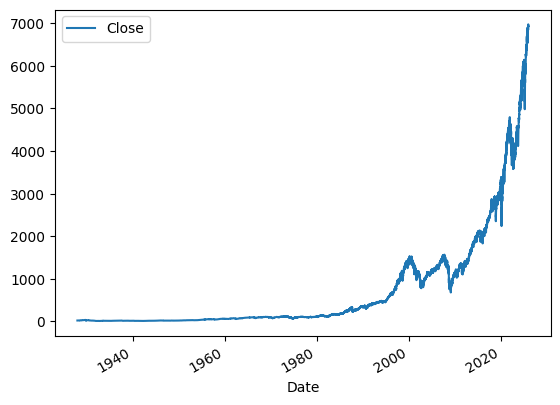

In [114]:
sp500.plot.line(y="Close", use_index=True)

In [115]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [116]:
sp500["Tomorrow"]= sp500["Close"].shift(-1)

In [117]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2026-01-09 00:00:00-05:00,6927.830078,6978.359863,6917.640137,6966.279785,5163900000,6977.270020
2026-01-12 00:00:00-05:00,6944.120117,6986.330078,6934.069824,6977.270020,5019040000,6963.740234
2026-01-13 00:00:00-05:00,6977.410156,6985.830078,6938.770020,6963.740234,5091730000,6926.600098


In [118]:
sp500["Target"]= (sp500["Tomorrow"] >sp500["Close"]).astype(int)

In [119]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2026-01-09 00:00:00-05:00,6927.830078,6978.359863,6917.640137,6966.279785,5163900000,6977.270020,1
2026-01-12 00:00:00-05:00,6944.120117,6986.330078,6934.069824,6977.270020,5019040000,6963.740234,0
2026-01-13 00:00:00-05:00,6977.410156,6985.830078,6938.770020,6963.740234,5091730000,6926.600098,0


In [120]:
sp500 =sp500.loc["1990-01-01":].copy()


In [121]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2026-01-09 00:00:00-05:00,6927.830078,6978.359863,6917.640137,6966.279785,5163900000,6977.270020,1
2026-01-12 00:00:00-05:00,6944.120117,6986.330078,6934.069824,6977.270020,5019040000,6963.740234,0
2026-01-13 00:00:00-05:00,6977.410156,6985.830078,6938.770020,6963.740234,5091730000,6926.600098,0


In [122]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators =200, min_samples_split=100, random_state=1)
train =sp500.iloc[:-100]
test =sp500.iloc[-100:]

predictors =["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [123]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [124]:
import pandas as pd
preds =pd.Series(preds, index =test.index)

In [125]:
preds

,0
Date,
2025-08-25 00:00:00-04:00,0
2025-08-26 00:00:00-04:00,0
2025-08-27 00:00:00-04:00,0
2025-08-28 00:00:00-04:00,0
2025-08-29 00:00:00-04:00,0
...,...
2026-01-09 00:00:00-05:00,0
2026-01-12 00:00:00-05:00,0
2026-01-13 00:00:00-05:00,0


In [126]:
precision_score(test["Target"], preds)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [127]:
combined= pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

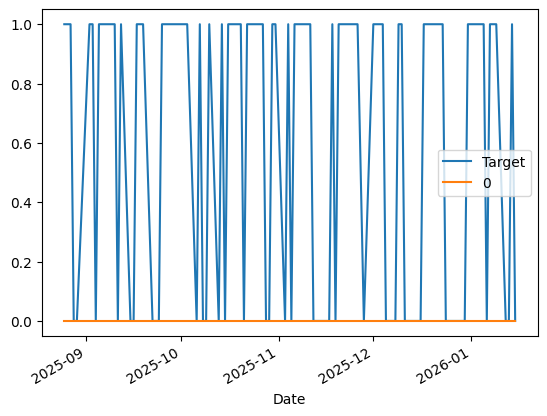

In [128]:
combined.plot()

In [129]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds =model.predict(test[predictors])
  preds =pd.Series(preds, index=test.index, name ="Predictions")
  combined =pd.concat([test["Target"],preds],axis=1)
  return combined

In [130]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train =data.iloc[0:i].copy()
    test =data.iloc[i:(i+step)].copy()
    predictions =predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [131]:
predictions =backtest(sp500, model, predictors)

In [132]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3844
1,2733


In [133]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298207098426637

In [134]:
predictions["Target"].value_counts()/predictions.shape[0]

,count
Target,
1,0.537631
0,0.462369


In [135]:
horizons =[2,5,60,250,1000]
new_predictors =[]

for horizon in horizons:
  rolling_averages =sp500.rolling(horizon).mean()

  ratio_column =f"Close_Ratio_{horizon}"
  sp500[ratio_column] =sp500["Close"]/rolling_averages["Close"]

  trend_column =f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors +=[ratio_column, trend_column]

In [136]:
sp500 =sp500.dropna()

In [137]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-08 00:00:00-05:00,6914.109863,6931.279785,6899.330078,6921.459961,5333200000,6966.279785,1,1.000038,1.0,1.001724,4.0,1.017815,36.0,1.109813,145.0,1.379171,533.0
2026-01-09 00:00:00-05:00,6927.830078,6978.359863,6917.640137,6966.279785,5163900000,6977.270020,1,1.003227,2.0,1.005074,4.0,1.023598,37.0,1.116184,146.0,1.387464,534.0
2026-01-12 00:00:00-05:00,6944.120117,6986.330078,6934.069824,6977.270020,5019040000,6963.740234,0,1.000788,2.0,1.004480,4.0,1.024445,37.0,1.117128,146.0,1.389013,534.0


In [138]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [139]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds =model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] =1
  preds[preds< .6] = 0
  preds =pd.Series(preds, index=test.index, name ="Predictions")
  combined =pd.concat([test["Target"],preds],axis=1)
  return combined

In [140]:
predictions =backtest(sp500, model, new_predictors)

In [141]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4703
1.0,873


In [142]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572737686139748